In [49]:
# TODO:
# - Handle emojis
# - Handle special characters (display '&' instead of "&amp;")
# - Remove HTML tags (like "<br>")
# - Translate text to english

# Finance News Sentiments Classifier

## Requirements

In [50]:
# `language_check` dependency must be used with Java 8
! sudo apt install openjdk-8-jdk -y
! sudo update-alternatives --set java /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java

# Working version of `language_check`
! pip install git+https://github.com/MCFreddie777/language-check.git

! pip install POT # pycontractions dependency
! pip install contractions # For counting contractions
! pip install pycontractions # For expanding contractions

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
openjdk-8-jdk is already the newest version (8u422-b05-1~22.04).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
  Cloning https://github.com/MCFreddie777/language-check.git to /tmp/pip-req-build-fs8b5zbx
  Running command git clone --filter=blob:none --quiet https://github.com/MCFreddie777/language-check.git /tmp/pip-req-build-fs8b5zbx
  Resolved https://github.com/MCFreddie777/language-check.git to commit 337493f25b5a49af0a09b0e264f306eccefaff8f
  Preparing metadata (setup.py) ... done


## Data Processing

### Dataset Retrieval

In [51]:
import pandas as pd
from pandas import DataFrame

dataset_path: str = "/kaggle/input/news-sentiment-analysis-for-stock-data-by-company/djia_news copy.csv/djia_news copy.csv"
column_names: list[str] = ["sentiment", "text"]
X: DataFrame = pd.read_csv(
    dataset_path,
    header=0,
    names=column_names,
    encoding="utf-8",
    encoding_errors="replace",
    usecols=[0, 2]
)
print(f"X shape: {X.shape}")
    
dataset_path: str = "/kaggle/input/news-sentiment-analysis-for-stock-data-by-company/nasdaq.csv/nasdaq.csv"
X1: DataFrame = pd.read_csv(
    dataset_path,
    header=0,
    names=column_names,
    encoding="utf-8",
    encoding_errors="replace",
    usecols=[0, 2]
)
print(f"X1 shape: {X1.shape}")
    
# Concatenate dataframes
X: DataFrame = pd.concat([X, X1])
print(f"Concatenated dataframe shape: {X.shape}")

# Map integers labels to string for data visualization
X["sentiment"] = X["sentiment"].map({
    0: "negative",
    1: "positive",
    2: "neutral"
})

# TODO: Remove links
X.sample(5)

X shape: (2381, 2)
X1 shape: (13181, 2)
Concatenated dataframe shape: (15562, 2)


,sentiment,text
10320,positive,Ramp up your Glamour Quotient This Diwali by V...
290,neutral,Apple asks Facebook to remove its spyware-like...
208,negative,Scientists want to build a super-fast self-rep...
8014,negative,https://bdkhabar24.com/%e0%a6%a8%e0%a7%8b%e0%a...
175,negative,Homa Finau Kim Share 3rd-Round Lead at America...


In [52]:
dataset_path: str = "/kaggle/input/stockmarket-sentiment-dataset/stock_data.csv"
column_names: list[str] = ["text", "sentiment"]
X1: DataFrame = pd.read_csv(
    dataset_path,
    header=0,
    names=column_names,
    encoding="utf-8",
    encoding_errors="replace"
)

# Reorder columns
X1: DataFrame = X1.reindex(columns=["sentiment", "text"])
X1.sample(5)

# Map integers labels to string for data visualization
X1["sentiment"] = X1["sentiment"].map({
    -1: "negative",
    1: "positive",
})
X1.sample(5)

X: DataFrame = pd.concat([X, X1])
X.sample(5)

,sentiment,text
12998,negative,Mark Zuckerberg accused of abusing power after...
9095,negative,Sale of Maggi noodles banned for 15 days in Delhi
5462,negative,Sony Ericsson Bluetooth Headset HBH-IV835 White
1310,negative,Justin Trudeau considers European troop commit...
527,negative,GLOBAL SUBSCRIPTION E-COMMERCE MARKET Is Expec...


In [53]:
dataset_path: str = "/kaggle/input/twitter-financial-news-sentiment-dataset/sent_train.csv"
column_names: list[str] = ["text", "sentiment"]
X1: DataFrame = pd.read_csv(
    dataset_path,
    header=0,
    names=column_names,
    encoding="utf-8",
    encoding_errors="replace"
)
    
dataset_path: str = "/kaggle/input/twitter-financial-news-sentiment-dataset/sent_valid.csv"
column_names: list[str] = ["text", "sentiment"]
X2: DataFrame = pd.read_csv(
    dataset_path,
    header=0,
    names=column_names,
    encoding="utf-8",
    encoding_errors="replace"
)

X1: DataFrame = pd.concat([X1, X2])
X1.sample(5)

# Reorder columns
X1: DataFrame = X1.reindex(columns=["sentiment", "text"])
X1.sample(5)

# Map integers labels to string for data visualization
X1["sentiment"] = X1["sentiment"].map({
    0: "negative",
    1: "positive",
    2: "neutral"
})
X1.sample(5)

# Concatenate dataframes
print(f"X shape: {X.shape}")
print(f"X1 shape: {X1.shape}")

X: DataFrame = pd.concat([X, X1])
print(f"Concatenated dataframe shape: {X.shape}")


X.sample(5)

X shape: (21353, 2)
X1 shape: (11931, 2)
Concatenated dataframe shape: (33284, 2)


,sentiment,text
1862,negative,K is closing lower slowly with greater-than-av...
4611,neutral,Highlight: “The U.S. consumer… [has] continued...
1047,negative,Home Depot Online Coupons Homedepot.com Coupon...
3484,positive,New York Times Q4 EPS 41 cents vs. 33 cents
11995,negative,Rwandan Coffee Farmers Turn Premium Beans Into...


In [54]:
dataset_path: str = "/kaggle/input/sentiment-analysis-for-financial-news/all-data.csv"
column_names: list[str] = ["sentiment", "text"]
X1: DataFrame = pd.read_csv(
    dataset_path,
    names=column_names,
    encoding="utf-8",
    encoding_errors="replace"
)
print(f"X shape: {X.shape}")
print(f"X1 shape: {X1.shape}")


# Concatenate dataframes
X: DataFrame = pd.concat([X, X1])
print(f"Concatenated dataframe shape: {X.shape}")

X.sample(5)

X shape: (33284, 2)
X1 shape: (4846, 2)
Concatenated dataframe shape: (38130, 2)


,sentiment,text
4342,negative,SHOT Setups: CF VBD TH CAT PSX DDS TV MSG OC WD
1647,negative,user: AAP Gap down for sure tommorow
3051,positive,Autodesk AutoCad 2021 Crack Keygen Number Free...
3901,negative,CEVA Logistics’ Rolls Royce Singapore warehous...
2831,negative,"Green Weekly & Monthly Triangle on HBAN,....pd..."


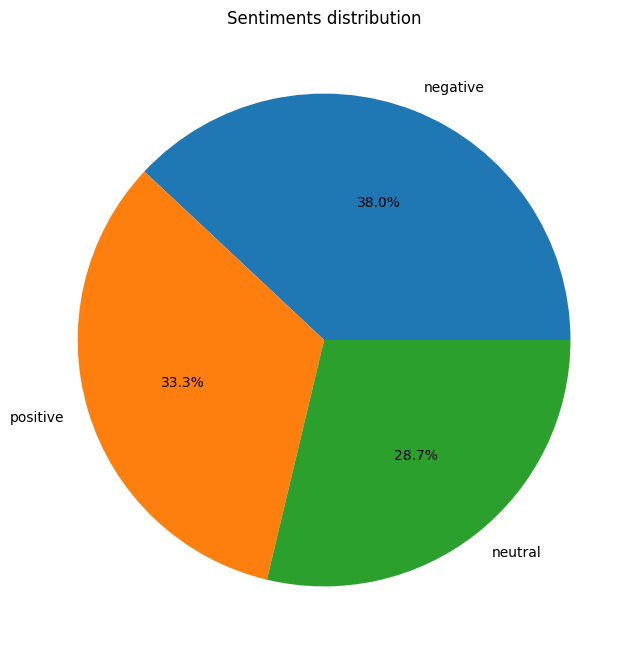

In [55]:
import matplotlib.pyplot as plt
from pandas import Series

label_counts: Series = X["sentiment"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')
plt.title('Sentiments distribution')
plt.show()

### Data Cleaning

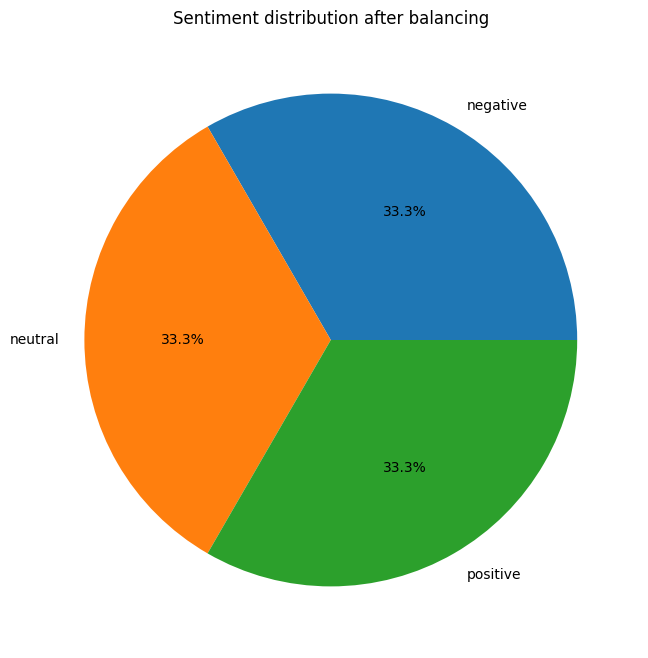

In [56]:
# Balance dataframe so that each sentiment has the same number of elements
min_label_count: int = label_counts.values[-1]
negative_sample: DataFrame = X[X["sentiment"] == "negative"].sample(min_label_count)
neutral_sample: DataFrame = X[X["sentiment"] == "neutral"].sample(min_label_count)
positive_sample: DataFrame = X[X["sentiment"] == "positive"].sample(min_label_count)
X: DataFrame = pd.concat([negative_sample, neutral_sample, positive_sample])

# Visualize sentiment distribution after balancing
label_counts: Series = X["sentiment"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')
plt.title('Sentiment distribution after balancing')
plt.show()

In [57]:
# Check for nulls
print("Nulls before dropping:", X.isnull().sum().sum())
print("Dropping nulls...")
X.dropna(inplace=True)
print("Nulls remaining:", X.isnull().sum().sum())

Nulls before dropping: 0
Dropping nulls...
Nulls remaining: 0


In [58]:
# Remove leading and trailing whitespaces and newlines characters
X["text"].str.strip()

12565    Workday surged 19% after earnings — but Wall S...
287      OVTI downgrade on Sept 7th 16.77 after Q1 look...
106      Royal Caribbean stock price target cut to $100...
7403     "The number of deaths in Moscow has increased ...
2990     CarDekho.com Awarded the Accolade of “Website ...
                               ...                        
3480     The professional hunter who helped American de...
3642     Watch 19.50 for EXP ahead of an expected earni...
196             Benchmark says this roof supplier is a Buy
4130     AAP Daylight savings has screwed up the Europe...
6933               Stocks That Hit 52-Week Highs On Monday
Name: text, Length: 32862, dtype: object

In [59]:
import re
from pandas import Index

# Remove all URLs
regex: str = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
urls: list[list[str]] = [re.findall(regex, x) for x in X.text]
urls: list[str] = [x for x1 in urls for x in x1 if x]
print(f"Number of URLs present in the dataset: {len(urls)}")

print("Cleaning...")
X.text.replace(inplace=True, regex=regex, value="")
    
urls: list[list[str]] = [re.findall(regex, x) for x in X.text]
urls: list[str] = [x for x1 in urls for x in x1 if x]
print(f"Remaining URLs: {len(urls)}")

Number of URLs present in the dataset: 6760
Cleaning...
Remaining URLs: 0


In [60]:
# Translate text to english

### Expand Contractions

In [61]:
from pycontractions import Contractions

path_to_model: str = "/kaggle/input/googlenewsvectors/GoogleNews-vectors-negative300.bin"

# Contractions object initialization takes a bit of time...  
contractions: Contractions = Contractions(path_to_model)
contractions.load_models()

In [62]:
import contractions as contractions_counter

# Contractions expansion takes time too...
print("Expanding contractions...")
X.text = X.text.apply(lambda x: list(contractions.expand_texts([x], precise=True))[0])

X.text.sample(10)

Expanding contractions...


4324     Meanwhile in China these things make crocs loo...
2019     Time Magazine acquired by Salesforce founder M...
8919     German News: "U.S. authorities: NASDAQ crash t...
3835     Highlight: “there is very little not to like a...
2478     Restaurant Brands Int'l tops Q4 estimates, but...
1197     user: .. AAP 600 is too far, highly unlikely c...
1385     CoolSys Opens New Southern California Training...
369      Boeing has power to turn off planes say Britis...
10680    N. Korea prepares for terror attacks on S. Kor...
5165     RT @PaulJDavies: I mean, just jaw-dropping &gt...
Name: text, dtype: object

In [97]:
# Check for duplicates
print("Duplicates found:", X.text.duplicated().sum().sum())
print("Removing duplicates...")
X.drop_duplicates(subset=["text"], inplace=True)
print("Duplicates remaining:", X.text.duplicated().sum().sum())

Duplicates found: 427
Removing duplicates...
Duplicates remaining: 0


In [40]:
# Make final dataset downloadable
path: str = "/kaggle/working/dataset.csv"
X.to_csv(path, index=False)

In [41]:
# Encode labels from string to integer
X["sentiment"] = X["sentiment"].map({
    'negative': 0,
    'neutral' : 1,
    'positive': 2
})

# Extract labels
Y: Series = X.pop("sentiment")

Y.sample(5)

7951    2
610     2
4852    0
6964    2
3187    2
Name: sentiment, dtype: int64

In [42]:
# Get the number of unique words in all the texts
def get_vocab_size(strings: Series) -> int:
    unique_words: set[str] = set()
    for string in strings:
        for word in string.split():
            unique_words.add(word)
    return len(unique_words)


vocab_size: int = get_vocab_size(X.squeeze())
print(f"Vocabulary size: {vocab_size}")

Vocabulary size: 68372


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(
    X,
    Y,
    test_size=0.25
)

print(f"X_train length: {len(X_train)}")
print(f"Y_train length: {len(Y_train)}")
print(f"X_val length: {len(X_val)}")
print(f"Y_val length: {len(Y_val)}")

X_train length: 24646
Y_train length: 24646
X_val length: 8216
Y_val length: 8216


## Model Building

### Neural Network Definition

In [44]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import keras

sequence_length = 64

vectorize_layer = keras.layers.TextVectorization(
    max_tokens=vocab_size,
    output_mode="int",
    output_sequence_length=sequence_length,
    name="text-vectorization"
)

vectorize_layer.adapt(X_train)

In [45]:
import tensorflow as tf
from keras import Sequential
from keras.src.layers import Conv1D, Dense, Dropout, Embedding, InputLayer, GlobalMaxPooling1D

embedding_dim = 128

model = Sequential([
    InputLayer((1,), dtype=tf.string),
    vectorize_layer,
    Embedding(vocab_size, embedding_dim, name="embedding"),
    Dropout(0.2, name="dropout-1"),
    Conv1D(64, 5, padding="valid", activation="relu", strides=3, name="conv-1d"),
    GlobalMaxPooling1D(name="global-max-pooling-1d"),
    Dense(32, activation="relu", name="dense"),
    Dropout(0.2, name="dropout-2"),
    Dense(3, activation="softmax", name="output")
], name="finance-news-sentiments-classifier")

model.summary()

Model: "finance-news-sentiments-classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text-vectorization              │ (None, 64)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 64, 128)        │     8,751,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout-1 (Dropout)             │ (None, 64, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv-1d (Conv1D)                │ (None, 20, 64)         │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global-max-pooling-1d           │ (None, 64)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout-2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,794,819 (33.55 MB)

 Trainable params: 8,794,819 (33.55 MB)

 Non-trainable params: 0 (0.00 B)

### Fitting

In [46]:
from keras.src.callbacks import History

epochs = 10

model.compile(
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
    optimizer="adam",
)

history: History = model.fit(
    X_train,
    Y_train,
    validation_data=(X_val, Y_val),
    epochs=epochs
)

Epoch 1/10
771/771 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.9986 - sparse_categorical_accuracy: 0.4697 - val_loss: 0.7454 - val_sparse_categorical_accuracy: 0.6700
Epoch 2/10
771/771 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.4521 - sparse_categorical_accuracy: 0.8303 - val_loss: 0.7878 - val_sparse_categorical_accuracy: 0.6789
Epoch 3/10
771/771 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.1789 - sparse_categorical_accuracy: 0.9445 - val_loss: 0.9912 - val_sparse_categorical_accuracy: 0.6769
Epoch 4/10
771/771 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0966 - sparse_categorical_accuracy: 0.9724 - val_loss: 1.1318 - val_sparse_categorical_accuracy: 0.6760
Epoch 5/10
771/771 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0616 - sparse_categorical_accuracy: 0.9804 - val_loss: 1.2676 - val_sparse_categorical_accuracy: 0.6739
Epoch 6/10
771/771 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0480 - sparse_categorical_accuracy: 0.9808 - val_loss: 1.4178 - val_sparse_categorical_accuracy: 0.6738
Epo

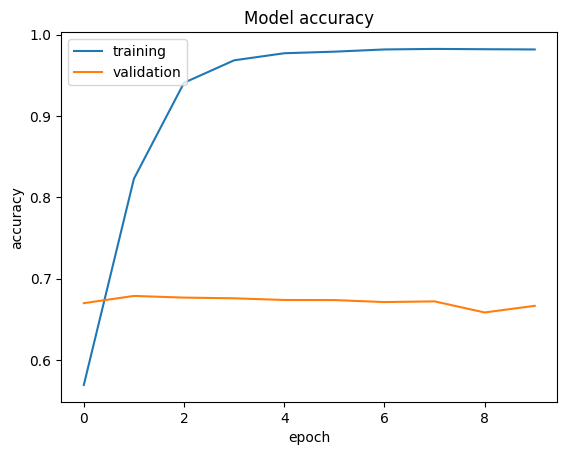

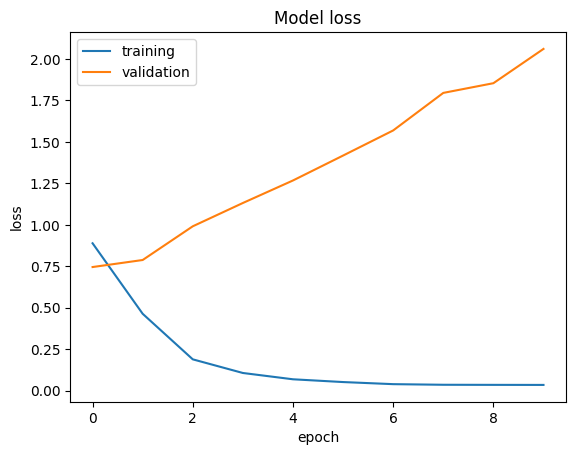

In [47]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


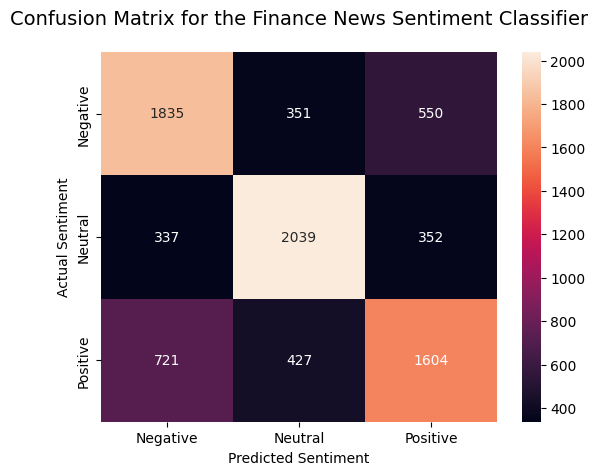

In [48]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

Y_pred = np.argmax(model.predict(X_val), axis=1)

conf_matrix = confusion_matrix(Y_val, Y_pred)

ax = sns.heatmap(conf_matrix, annot=True, fmt="d")
ax.set_xlabel("Predicted Sentiment")
ax.xaxis.set_ticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Actual Sentiment")
ax.yaxis.set_ticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_title("Confusion Matrix for the Finance News Sentiment Classifier", fontsize=14, pad=20)
plt.show()